<a href="https://colab.research.google.com/github/AndreNasci/TinyML/blob/main/Class%2006%20-%20ML%20Regression%20with%20DNN/TF_First_Neural_Network_exploring_epochs_and_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF First Neural Network V2
- Exploring EPOCHS using CallBacks

## Import Libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

# verificar versão do TF
print(tf.version.VERSION)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


## Dataset

In [3]:
# define some training data (xs as inputs and ys as outputs)

# esses pontos formam uma reta
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float) 
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Define Model (NN Arquitecture)

In [4]:
# define a neural network with one neuron
# for more information on TF functions see: https://www.tensorflow.org/api_docs

# um neurônio e uma entrada
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

## Compile Model

In [5]:
# use stochastic gradient descent (sgd) for optimization and
# the mean squared error loss function

model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Viewing initial weights (parameters)

In [7]:
model.get_weights() # list of parameters 

[array([[-0.20426643]], dtype=float32), array([0.], dtype=float32)]

In [8]:
print("wi = ", model.get_weights()[0])
print("b  = ", model.get_weights()[1])

wi =  [[-0.20426643]]
b  =  [0.]


## Training

More info about callbacks:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

A callback is a powerful tool to **customize the behavior of a Keras model during training, evaluation, or inference**. Examples include tf.keras.callbacks.TensorBoard to visualize training progress and results with TensorBoard, or tf.keras.callbacks.ModelCheckpoint to periodically save your model during training.
https://www.tensorflow.org/guide/keras/custom_callback

All callbacks subclass the keras.callbacks.Callback class, and override a set of methods called at various stages of training, testing, and predicting. Callbacks are useful to get a **view on internal states and statistics of the model during training.**

In [11]:
predictions = []
# Subclass keras.callbacks.Callback (custom callback)
class myCallback(tf.keras.callbacks.Callback):
  # override method
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

In [ ]:
# fit the model to the data (aka train the model)

history = model.fit(xs, ys, epochs=500, callbacks=[callbacks], verbose=0)

In [15]:
# This callback is automatically applied to every Keras model. The History object gets returned by the fit method of models.
type(history)

keras.callbacks.History

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History </br>
`dir(history)`: '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',
 '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks',
 '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin',
 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end',
 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']

Inspect model

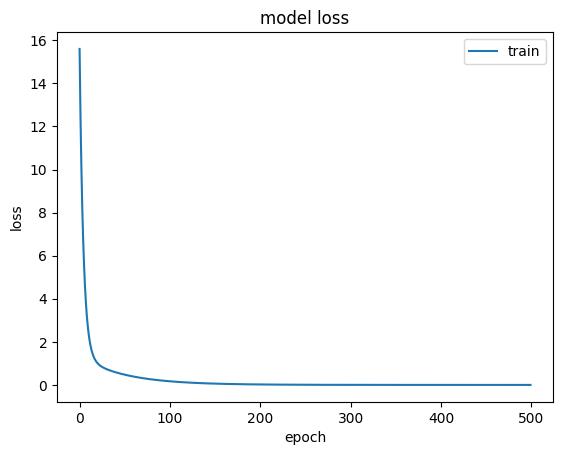

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [31]:
print("wi = ", model.get_weights()[0])
print("b  = ", model.get_weights()[1])

wi =  [[1.9972397]]
b  =  [-0.99144226]


## Test model

In [ ]:
# Predict the output of a new data (Inference)

print(model.predict([10.0]))

[[18.984566]]


In [32]:
# Inferência dos dados de treino
y_hat = model.predict(xs)
y_hat.shape

1/1 [==============================] - 0s 39ms/step


(6, 1)

In [33]:
y_hat

array([[-2.988682  ],
       [-0.99144226],
       [ 1.0057974 ],
       [ 3.0030372 ],
       [ 5.000277  ],
       [ 6.9975166 ]], dtype=float32)

In [34]:
# Dados verdadeiros de outputs
ys

array([-3., -1.,  1.,  3.,  5.,  7.])

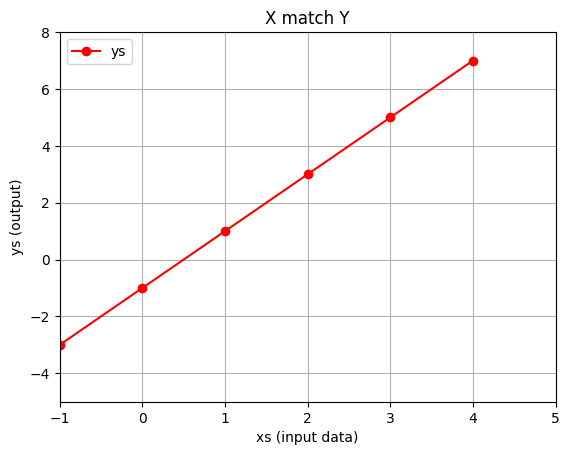

In [35]:
# Plot dos dados verdadeiros de saída
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.axis([-1,5,-5,8])
plt.title('X match Y')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

In [ ]:
# Quantidade de predictions geradas do treino (1 por época)
len(predictions)

500

In [ ]:
# predicitions da época 10
predictions[10]

array([[-1.3970841],
       [ 0.0438943],
       [ 1.4848727],
       [ 2.925851 ],
       [ 4.3668294],
       [ 5.807808 ]], dtype=float32)

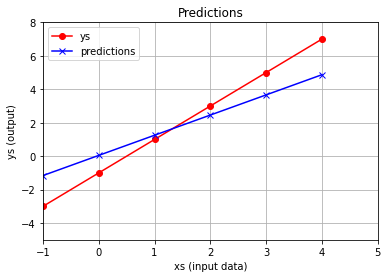

In [ ]:
# Plot das predictions da época 5
EPOCH = 5
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.plot(xs, predictions[EPOCH-1], color='blue', marker='x', label='predictions')
plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

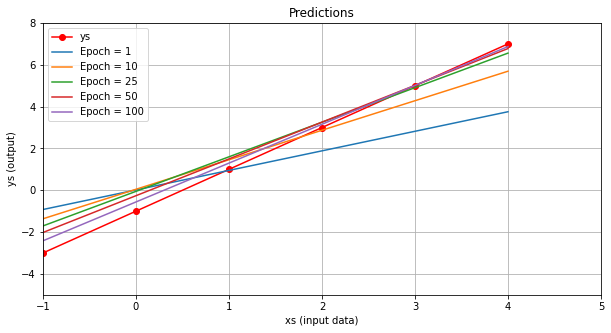

In [ ]:
# Plot com predictions de várias épocas
EPOCHS = [1, 10, 25, 50, 100]
plt.figure(figsize=(10,5))
plt.plot(xs, ys, color='red', marker='o', label='ys')
for EPOCH in EPOCHS:
    plt.plot(xs, predictions[EPOCH-1], label = "Epoch = "+str(EPOCH))

plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()